In [355]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [356]:
# Define the problem to solve 2 input XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[  0,       1,     1,       0]])

In [357]:
# Initialize weights and biases, thereby deciding on the network configuration
W01 = np.random.randn(2, 2) * 0.5  # 2 neurons times 2 inputs
B01 = np.zeros((2, 1))  # 2 neurons times 1 bias
W12 = np.random.randn(1, 2) * 0.5  # 1 neuron times 2 inputs
B12 = np.zeros((1, 1))  # 1 neuron times 1 bias

# Define activation function and its derivative
sigmoid = lambda a : 1/(1 + np.exp(-a))
sigmoid_mirp = lambda y: y * (1 - y)

# Define the cost function
cost = lambda m, Y, A : -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # compute cost

epoch #0 cost: 0.77
epoch #20 cost: 0.77
epoch #40 cost: 0.77
epoch #60 cost: 0.77
epoch #80 cost: 0.77
epoch #100 cost: 0.77
epoch #120 cost: 0.77
epoch #140 cost: 0.77
epoch #160 cost: 0.77
epoch #180 cost: 0.77
epoch #200 cost: 0.76
epoch #220 cost: 0.76
epoch #240 cost: 0.76
epoch #260 cost: 0.76
epoch #280 cost: 0.76
epoch #300 cost: 0.76
epoch #320 cost: 0.76
epoch #340 cost: 0.76
epoch #360 cost: 0.76
epoch #380 cost: 0.76
epoch #400 cost: 0.76
epoch #420 cost: 0.76
epoch #440 cost: 0.76
epoch #460 cost: 0.76
epoch #480 cost: 0.76
epoch #500 cost: 0.76
epoch #520 cost: 0.76
epoch #540 cost: 0.76
epoch #560 cost: 0.76
epoch #580 cost: 0.76
epoch #600 cost: 0.75
epoch #620 cost: 0.75
epoch #640 cost: 0.75
epoch #660 cost: 0.75
epoch #680 cost: 0.75
epoch #700 cost: 0.75
epoch #720 cost: 0.75
epoch #740 cost: 0.75
epoch #760 cost: 0.75
epoch #780 cost: 0.75
epoch #800 cost: 0.75
epoch #820 cost: 0.75
epoch #840 cost: 0.75
epoch #860 cost: 0.75
epoch #880 cost: 0.75
epoch #900 cost:

epoch #7200 cost: 0.71
epoch #7220 cost: 0.71
epoch #7240 cost: 0.71
epoch #7260 cost: 0.71
epoch #7280 cost: 0.71
epoch #7300 cost: 0.71
epoch #7320 cost: 0.71
epoch #7340 cost: 0.71
epoch #7360 cost: 0.71
epoch #7380 cost: 0.71
epoch #7400 cost: 0.71
epoch #7420 cost: 0.71
epoch #7440 cost: 0.71
epoch #7460 cost: 0.71
epoch #7480 cost: 0.71
epoch #7500 cost: 0.71
epoch #7520 cost: 0.71
epoch #7540 cost: 0.71
epoch #7560 cost: 0.71
epoch #7580 cost: 0.71
epoch #7600 cost: 0.71
epoch #7620 cost: 0.71
epoch #7640 cost: 0.71
epoch #7660 cost: 0.71
epoch #7680 cost: 0.71
epoch #7700 cost: 0.71
epoch #7720 cost: 0.71
epoch #7740 cost: 0.71
epoch #7760 cost: 0.71
epoch #7780 cost: 0.71
epoch #7800 cost: 0.71
epoch #7820 cost: 0.71
epoch #7840 cost: 0.71
epoch #7860 cost: 0.71
epoch #7880 cost: 0.71
epoch #7900 cost: 0.71
epoch #7920 cost: 0.71
epoch #7940 cost: 0.71
epoch #7960 cost: 0.71
epoch #7980 cost: 0.71
epoch #8000 cost: 0.71
epoch #8020 cost: 0.71
epoch #8040 cost: 0.71
epoch #8060

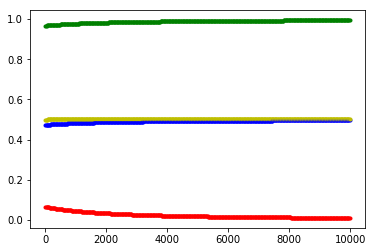

In [359]:
#settings
max_epochs = 10000
learning_rate = 0.01
m = W01.shape[1]  # amount of examples
debug = False
sigma = 0.1

for epoch in range(max_epochs):
    # Forward propagation
    A0 = X
    Z1 = W01.dot(A0) + B01
    A1 = np.tanh(Z1)
    if debug: print("A1:", A1)
    Z2 = W12.dot(A1) + B12
    A2 = sigmoid(Z2)
    if debug: print("A2:", A2)

    Yhat = A2
    loss = cost(m, Y, Yhat)
    


    # Backward propagation
    # layer 2 output layer
   # derivative = sigmoid_mirp(A2)
    #print("error inoutput: A2 - Y =", A2 - Y)  # opposite article
    #print("derivative = ", derivative)
    dZ2 = (A2 - Y) #* sigmoid_mirp(A2)  # <----- y = k(y) x -> x = y/k(y)
    #print("dZ2 =", dZ2)
    
    if debug or epoch % 20 == 0:
        print("epoch #{} cost: {:.2f}".format(epoch, loss))
        if debug:
            print(Yhat, (Yhat > 0.5) * 1, dZ2)
        plt.plot(epoch, Yhat[0][0], 'r.')
        plt.plot(epoch, Yhat[0][1], 'g.')
        plt.plot(epoch, Yhat[0][2], 'b.')
        plt.plot(epoch, Yhat[0][3], 'y.')
        
        
    if (abs(loss) < sigma):
        print("Done after #{} epocs with cost {}".format(epoch, loss))
        interpret = (Yhat > 0.5) * 1
        print(Yhat, interpret, interpret == Y)
        print(W01, B01, W12, B12)
        break
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    if debug: print("dZ2 =", dZ2, "\ndW2 =", dW2, "\ndB2 =", dB2)
    # layer 1 hidden layer
    dZ1 = W12.T.dot(dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m * dZ1.dot(A0.T)
    dB1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    if debug: print("dZ1 =", dZ1, "\ndW1 =", dW1, "\ndB1 =", dB1) 

    # Update weights
    W01 -= learning_rate * dW1
    B01 -= learning_rate * dB1
    W12 -= learning_rate * dW2
    B12 -= learning_rate * dB2
    
plt.show()